In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv("data\\cleaned_housingprice_data.csv", index_col = [0])

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,0,NoFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,0,NoFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,NoFence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,NoFence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,NoFence,None,0,12,2008,WD,Normal,250000


In [4]:
df.isna().any().sum()

0

Text(0.5, 1.0, 'Distribution of Salesprice')

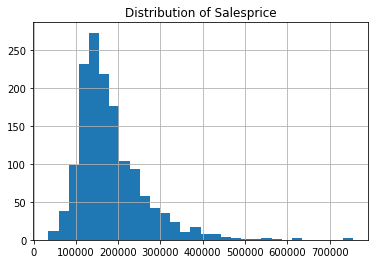

In [5]:
df.SalePrice.hist(bins = 30)
plt.title('Distribution of Salesprice')

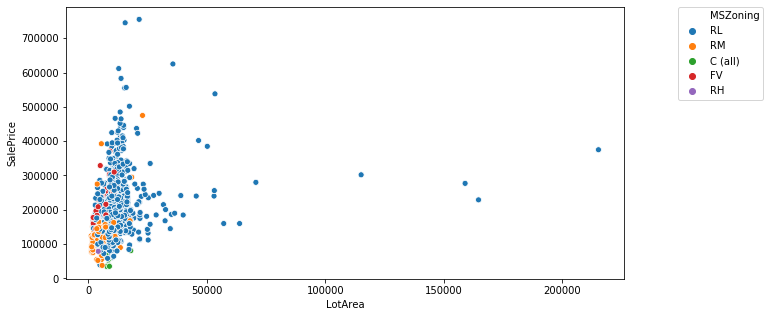

In [6]:
plt.subplots(figsize = (10,5))
g = sns.scatterplot(x = 'LotArea', y = 'SalePrice', hue = 'MSZoning', data = df)
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)

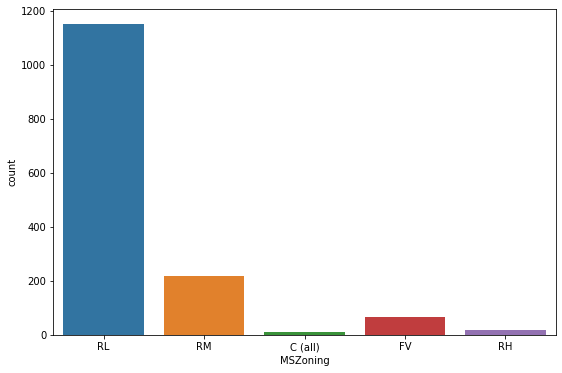

In [7]:
df.MSZoning.value_counts()
plt.subplots(figsize = (9,6))
g = sns.countplot(x= 'MSZoning', data = df)


In [8]:
df.query('MSZoning == "C (all)"')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,0,MnPrv,None,0,7,2008,WD,Normal,40000
88,89,50,C (all),105.0,8470,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,MnPrv,None,0,10,2009,ConLD,Abnorml,85000
93,94,190,C (all),60.0,7200,Pave,NoAlley,Reg,Lvl,AllPub,...,0,0,NoFence,None,0,11,2007,WD,Normal,133900
495,496,30,C (all),60.0,7879,Pave,NoAlley,Reg,Lvl,AllPub,...,0,0,GdWo,None,0,11,2009,WD,Abnorml,34900
557,558,50,C (all),60.0,11040,Pave,NoAlley,Reg,Low,AllPub,...,0,0,NoFence,None,0,9,2006,COD,Normal,108000
711,712,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,...,0,0,NoFence,None,0,1,2010,WD,Abnorml,102776
812,813,20,C (all),66.0,8712,Grvl,NoAlley,Reg,Bnk,AllPub,...,0,0,NoFence,Shed,54,6,2010,WD,Alloca,55993
916,917,20,C (all),50.0,9000,Pave,NoAlley,Reg,Lvl,AllPub,...,0,0,NoFence,None,0,10,2006,WD,Abnorml,35311
1061,1062,30,C (all),120.0,18000,Grvl,NoAlley,Reg,Low,AllPub,...,0,0,NoFence,Shed,560,8,2008,ConLD,Normal,81000
1279,1280,50,C (all),60.0,7500,Pave,NoAlley,Reg,Lvl,AllPub,...,0,0,NoFence,None,0,4,2010,COD,Abnorml,68400


In [9]:
df = df[df.MSZoning != 'C (all)']

In [10]:
#pd.set_option("display.max_columns", 100)
df.MSZoning.unique()

array(['RL', 'RM', 'FV', 'RH'], dtype=object)

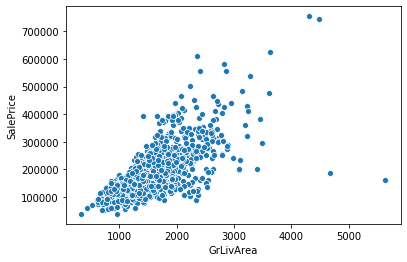

In [11]:
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df)

In [12]:
df = df[~((df.GrLivArea > 4000) & (df.SalePrice < 300000))]

Text(0.5, 1.0, 'SalePrice by Month Sold')

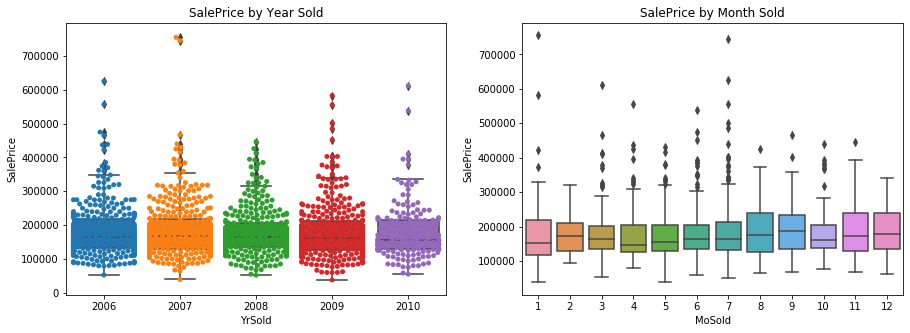

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2 , figsize = (15,5))
sns.swarmplot(x = 'YrSold',y ='SalePrice', data = df, ax = ax1)
sns.boxplot(x = 'YrSold',y ='SalePrice', data = df, ax = ax1)
ax1.set_title('SalePrice by Year Sold')
sns.boxplot(x = 'MoSold', y = 'SalePrice', data = df, ax = ax2 )
ax2.set_title('SalePrice by Month Sold')

C:\Users\Navina\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 <a list of 55 Text xticklabel objects>)

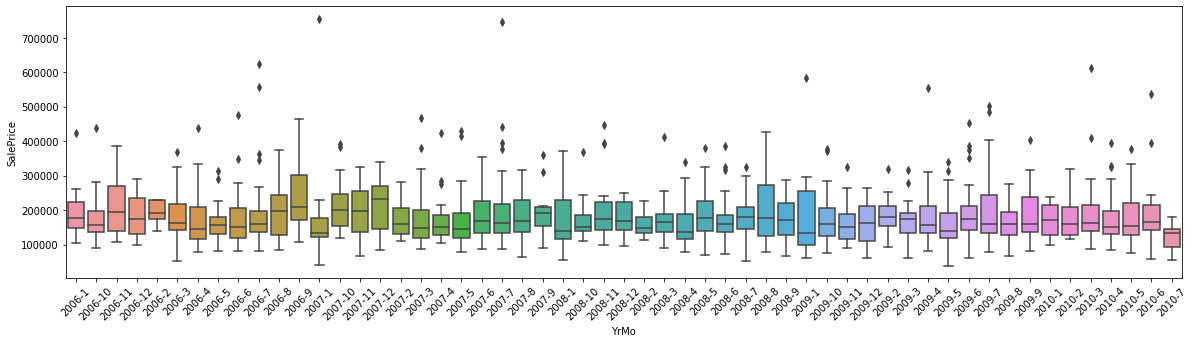

In [14]:
c1 = df[['YrSold', 'MoSold', 'SalePrice']]
c1['YrMo'] = c1['YrSold'].astype(str) +'-'+c1['MoSold'].astype(str)
c1 = c1.sort_values(by = 'YrMo')
plt.subplots(figsize = (20,5))
sns.boxplot(x = 'YrMo', y = 'SalePrice', data = c1 )
plt.xticks(rotation=45 )

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model = ols('SalePrice ~ C(YrSold)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output

,sum_sq,df,F,PR(>F)
C(YrSold),1.307420e+10,4.0,0.520007,0.721053
Residual,9.070106e+12,1443.0,NaN,NaN


In [16]:
model = ols('SalePrice ~ C(YrSold) + C(MoSold) + C(YrSold):C(MoSold)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

C:\Users\Navina\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Navina\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 8
  'rank is %d' % (J, J_), ValueWarning)
C:\Users\Navina\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 44, but rank is 39
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
C(YrSold),1.768733e+10,4.0,0.701949,0.402273
C(MoSold),8.653551e+10,11.0,1.248835,0.266684
C(YrSold):C(MoSold),2.486673e+11,44.0,0.897159,0.652274
Residual,8.775014e+12,1393.0,NaN,NaN


From the plots and p value obtained from anova analysis, we conclude that there is no significant variation in the sale price based on the year and month sold. Therefore, we remove the YrSold and MoSold field for the model.

In [17]:
df.reset_index(drop = True, inplace = True)
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].describe()

,YearBuilt,YearRemodAdd,GarageYrBlt
count,1448.000000,1448.000000,1448.000000
mean,1971.543508,1985.017956,1982.481354
std,30.013718,20.548786,28.891493
min,1872.000000,1950.000000,1906.000000
25%,1954.000000,1967.000000,1962.000000
50%,1973.000000,1994.000000,1984.500000
75%,2000.250000,2004.000000,2003.000000
max,2010.000000,2010.000000,2050.000000


In [18]:
df['House_Age'] = df['YrSold'] - df['YearBuilt']
df['Years_Since_Modified'] = df['YrSold'] - df['YearRemodAdd']
df['Garage_Age'] = df['YrSold'] - df['GarageYrBlt']
df[['YearBuilt', 'YearRemodAdd', 'YrSold','House_Age', 'Years_Since_Modified', 'Garage_Age']]

,YearBuilt,YearRemodAdd,YrSold,House_Age,Years_Since_Modified,Garage_Age
0,2003,2003,2008,5,5,5.0
1,1976,1976,2007,31,31,31.0
2,2001,2002,2008,7,6,7.0
3,1915,1970,2006,91,36,8.0
4,2000,2000,2008,8,8,8.0
...,...,...,...,...,...,...
1443,1999,2000,2007,8,7,8.0
1444,1978,1988,2010,32,22,32.0
1445,1941,2006,2010,69,4,69.0
1446,1950,1996,2010,60,14,60.0


In [19]:
df['MSSubClass'] = df.MSSubClass.astype('str')

In [20]:
df.drop(columns = ['YrSold','MoSold','YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], inplace = True)

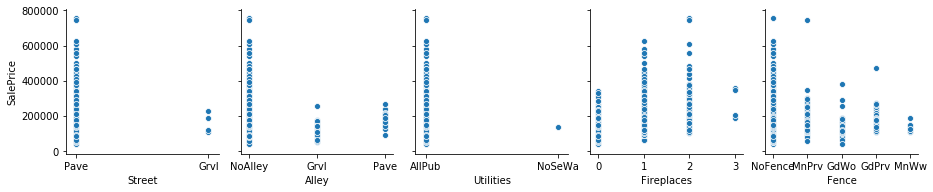

In [21]:
sns.pairplot(df,y_vars=['SalePrice'],
                  x_vars=['Street', 'Alley', 'Utilities', 'Fireplaces', 'Fence'])

In [22]:
num_cols = df.columns[df.dtypes != 'object'][1:]
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'SalePrice',
       'House_Age', 'Years_Since_Modified', 'Garage_Age'],
      dtype='object')

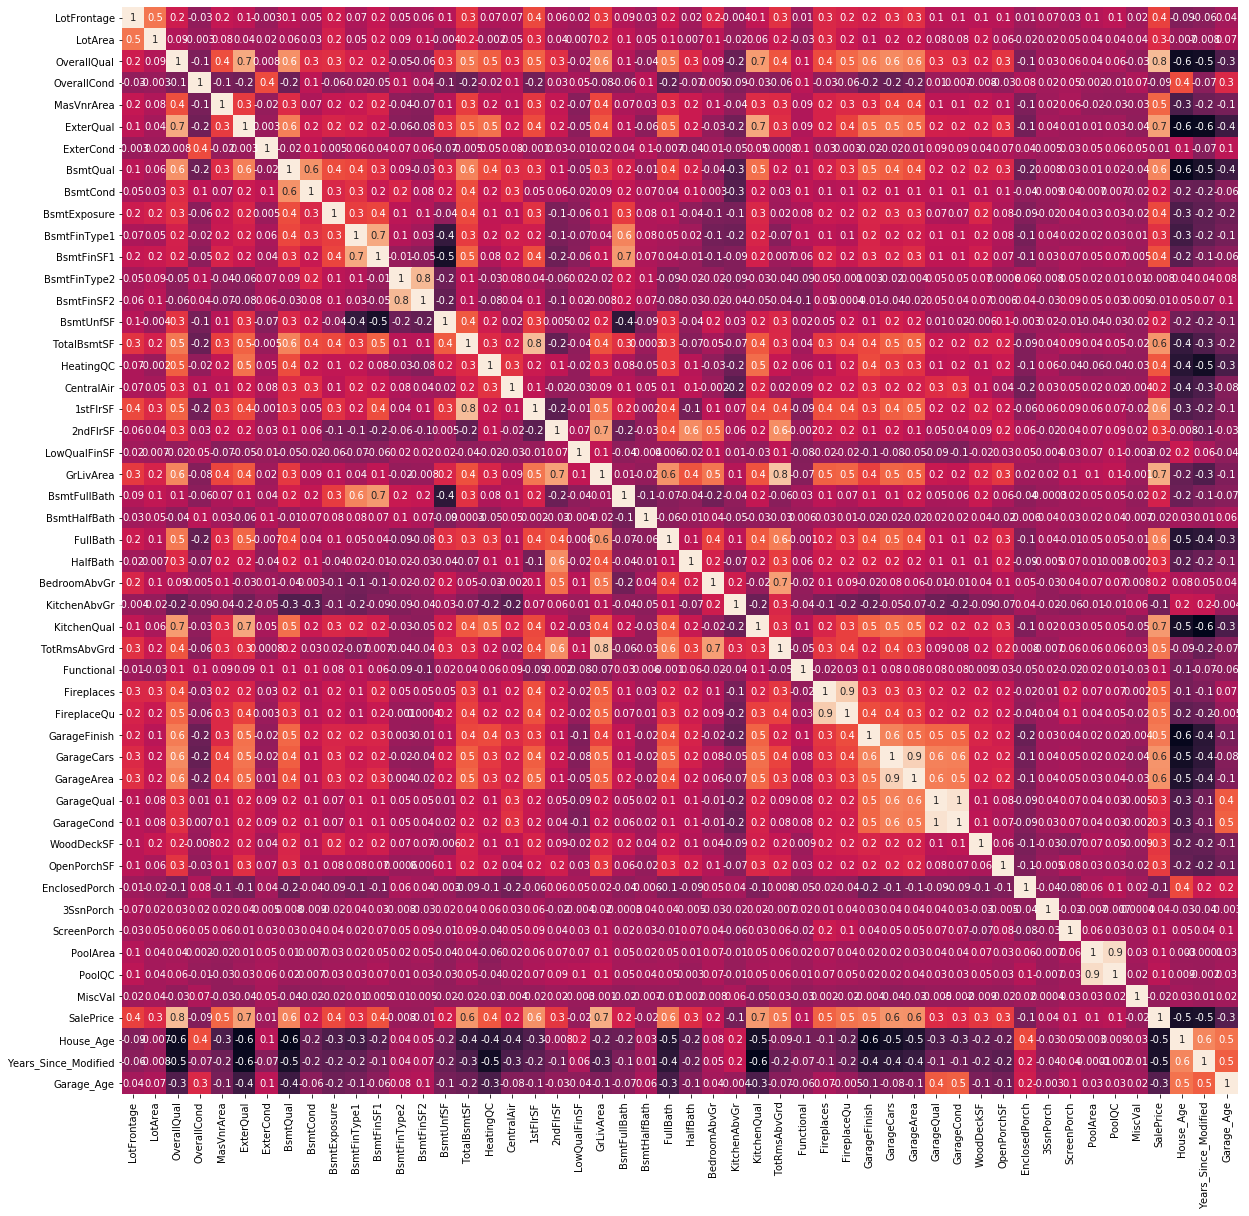

In [23]:
plt.subplots(figsize = (20,20))
g = sns.heatmap(df[num_cols].corr(), annot = True, cbar = False, fmt = ".1g" )

Sale Price is strongly associated with the overall quality of the house. TotRmsAbvGrd(Total rooms above grade) and GrLivArea (Above grade living area) are highly correlated. Also, GarageCars has a strong correlation with GarageArea. To avoid multicollinearity, we drop GarageCars and TotRmsAbvGrd from the model. 

In [24]:
pd.set_option("display.max_columns", 200)
df[num_cols].describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,House_Age,Years_Since_Modified,Garage_Age
count,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000,1448.000000
mean,70.587251,10466.557320,6.109116,5.582873,102.242403,3.398481,3.084945,3.490331,2.935773,1.627072,3.553867,440.319061,1.249309,46.935083,567.231354,1054.485497,4.149171,0.938536,1160.974448,346.156077,5.538674,1512.669199,0.426105,0.057320,1.567680,0.383978,2.870166,1.046271,3.514503,6.515193,4.892265,0.614641,1.832182,1.718232,1.769337,472.341851,2.812845,2.812155,94.666436,46.120166,21.566298,3.437845,15.117403,2.450276,0.015193,43.425414,181667.759669,36.269337,22.794890,25.331492
std,22.915618,9889.736752,1.366182,1.107883,179.324051,0.569361,0.349303,0.877368,0.553326,1.066101,2.107970,433.091749,0.895739,161.930868,442.807408,415.368580,0.959360,0.240263,372.019554,435.985465,46.964939,507.438736,0.517886,0.238404,0.548522,0.503278,0.815194,0.219788,0.660723,1.615762,0.451668,0.642306,1.809943,0.891889,0.744925,211.102575,0.718153,0.714596,125.573201,64.255564,60.875583,29.436993,55.929193,38.341214,0.248931,497.977672,79229.096063,30.054626,20.537459,28.917356
min,21.000000,1300.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37900.000000,0.000000,0.000000,-44.000000
25%,60.000000,7538.750000,5.000000,5.000000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,222.500000,796.000000,3.000000,1.000000,882.000000,0.000000,0.000000,1131.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,5.000000,0.000000,0.000000,1.000000,1.000000,336.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130000.000000,7.750000,4.000000,4.750000
50%,70.000000,9491.000000,6.000000,5.000000,0.000000,3.000000,3.000000,4.000000,3.000000,1.000000,4.000000,384.000000,1.000000,0.000000,475.000000,992.000000,5.000000,1.000000,1088.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,5.000000,1.000000,2.000000,2.000000,2.000000,479.500000,3.000000,3.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163945.000000,34.500000,14.000000,23.500000
75%,80.000000,11601.500000,7.000000,6.000000,163.250000,4.000000,3.000000,4.000000,3.000000,2.000000,6.000000,712.250000,1.000000,0.000000,808.000000,1299.250000,5.000000,1.000000,1392.000000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,5.000000,1.000000,4.000000,2.000000,2.000000,576.000000,3.000000,3.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.00000

In [25]:
df.drop(columns = ['GarageCars','TotRmsAbvGrd', 'SaleType', 'SaleCondition'], inplace = True)

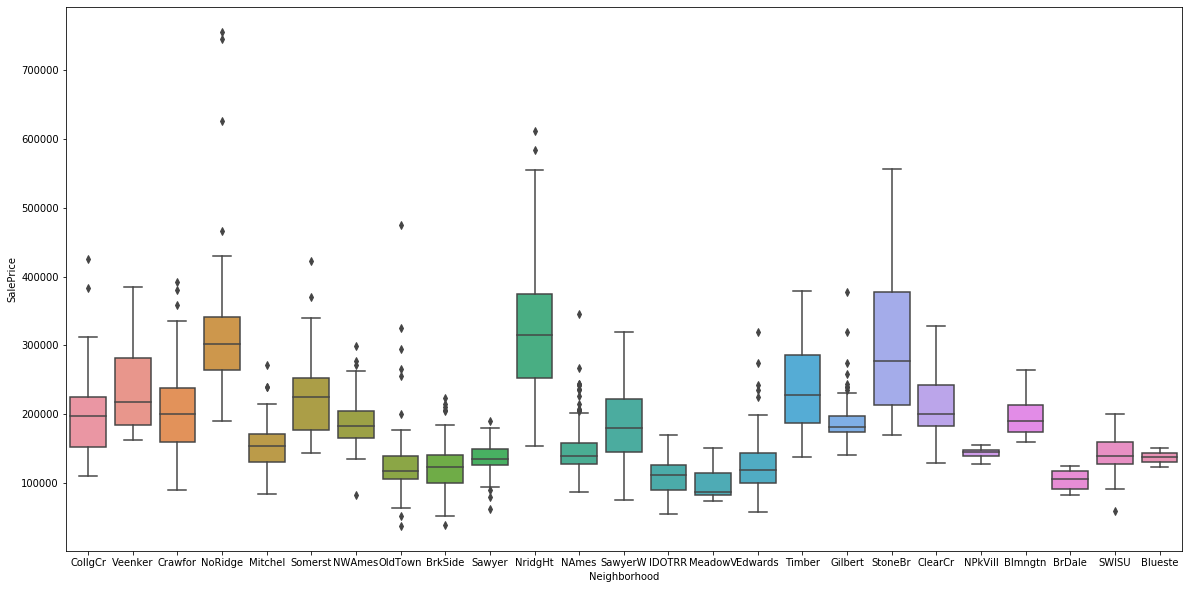

In [26]:
plt.subplots(figsize = (20,10))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df)

In [27]:
df.groupby(['Neighborhood']).size().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,17,2,16,58,28,150,51,98,79,28,17,49,225,9,73,41,77,112,25,74,59,86,25,38,11


In [28]:
df['TotalBaths'] = df['FullBath']+0.5*df['HalfBath']
df['LivingArea'] = (df['TotalBsmtSF']+ df['2ndFlrSF']+df['1stFlrSF'])
#df['PercLivingArea'] = (df['TotalBsmtSF']+ df['2ndFlrSF']+df['1stFlrSF'])/df.LotArea
#df['PercBsmt1'] = df['BsmtFinSF1'].div(df['TotalBsmtSF']).replace(np.nan,0)
df['PorchDeckSF'] = df[[ 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].sum(axis =1)

In [29]:
from sklearn import linear_model
import statsmodels.api as sm
X = df[['OverallQual','LivingArea','MasVnrArea','Functional','GarageArea','ExterQual','LotArea','KitchenQual', 'PorchDeckSF','GrLivArea' ,'BedroomAbvGr' ]]
y = df['SalePrice']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     735.7
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:33:33   Log-Likelihood:                -17018.
No. Observations:                1448   AIC:                         3.406e+04
Df Residuals:                    1436   BIC:                         3.412e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.801e+05   1.06e+04    -16.951   

In [30]:
#from IPython.display import display, HTML
#display(pd.crosstab(df.MSZoning,df.MSSubClass))
#display(pd.crosstab( df.MSZoning,df.MSSubClass, values = df.SalePrice, aggfunc = 'mean').fillna(0).astype('int'))

In [31]:
dfnum = df.select_dtypes(exclude = 'object').drop(columns = ['Id','SalePrice'])
dfnum.shape

(1448, 50)

In [32]:
scale = StandardScaler()
dfnum_scaled = scale.fit_transform(dfnum)

In [33]:
pca = PCA()
dfnum_pca = pd.DataFrame(pca.fit_transform(dfnum_scaled), columns = ['PC'+str(i+1) for i in range(dfnum.shape[1])])
dfnum_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,1.741837,0.264759,-2.185703,-0.733470,1.915649,1.759534,-0.245580,1.027152,1.199630,-0.252593,-0.434458,-0.494772,-0.458218,0.515396,-0.213688,0.442842,-0.097630,0.537969,-0.017573,-0.535509,0.322432,-0.223332,-0.164518,-0.372175,0.354053,0.103067,0.182136,0.389215,-0.254435,-0.111658,0.058665,0.098693,0.227859,-0.384139,-0.067678,0.157836,-0.020175,-0.068855,-0.017582,0.060908,-0.042626,0.046148,0.102453,0.019553,0.010412,-2.560011e-15,2.393962e-15,5.062724e-16,1.150833e-15,6.174326e-16
1,0.795372,-1.866495,0.958643,-0.130292,0.443188,-0.535755,-0.135982,-1.474405,0.638670,0.274460,1.974273,1.625746,1.530016,-2.016360,-1.466839,-1.498037,-0.208758,1.274852,-0.298485,0.599805,-2.006896,0.417243,0.677513,-0.344751,-1.147584,-0.452065,0.541394,-0.294506,1.010478,0.797502,-0.904772,0.254443,-0.065347,-0.847482,0.440864,-0.701700,0.457276,0.445651,-0.301183,-0.702543,0.233721,0.025327,-0.101143,0.059751,0.010159,7.047796e-15,-1.909525e-15,1.417541e-15,3.389136e-16,1.254599e-15
2,2.524470,0.418989,-1.443950,-0.645163,1.276409,1.451331,-0.437667,0.469001,0.254720,-1.123183,0.257792,-0.895913,-0.780093,0.005667,0.121456,0.232500,-0.037125,0.186277,-0.059245,0.029287,-0.166539,0.258256,0.062478,0.243608,0.002877,-0.187172,0.103813,0.160157,-0.635751,0.194064,0.253036,0.407190,0.128614,-0.523820,0.172786,0.575131,-0.146587,-0.116310,-0.033522,-0.109632,0.017708,0.070386,0.042852,0.017298,-0.019631,6.441283e-15,-8.012067e-16,-1.337424e-15,3.033828e-15,6.312829e-16
3,-0.797531,-0.149630,1.451138,-0.350640,0.535767,-0.705127,0.091183,-1.539863,-0.600077,-0.489698,-2.168714,-0.642852,-3.010269,-0.760746,-0.261970,0.405398,0.852399,0.839296,0.252950,-0.744018,-1.367966,-1.271438,-0.190642,0.703519,0.255077,0.522348,0.011635,-0.550298,-2.071497,0.670496,0.558969,-0.882393,-0.229185,0.545640,0.259217,1.006135,0.839683,-1.267622,-0.390581,0.948970,-0.430532,0.691360,-0.186895,0.045305,-0.134446,1.219682e-16,-7.084021e-17,1.149123e-15,7.531164e-16,-2.315538e-18
4,4.550269,0.717832,-0.004617,0.071377,1.410658,1.426988,-0.816243,0.008771,0.306449,-0.059515,-0.034923,0.483330,-0.612252,-0.035370,0.010449,0.020936,-0.305038,0.200224,0.466085,-0.302871,0.592820,0.057083,0.206742,0.308650,-0.709378,-0.793608,0.005556,-0.251845,-1.008658,0.370908,0.204724,0.115610,-0.146166,-0.452755,0.050594,0.410962,0.111914,-0.220167,0.347044,-0.133395,0.170197,-0.028355,0.038160,0.025152,-0.009325,1.070912e-15,-1.622984e-15,-4.127484e-16,-1.684059e-16,3.723832e-16


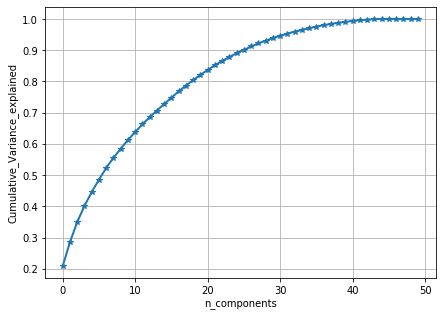

In [34]:
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)#plot PCA spectrum   
plt.figure(1,figsize=(7,5)) 
plt.plot(cum_var_explained,linewidth=2, marker = '*')  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [35]:
pd.DataFrame({'PC1': pca.components_[0], 'PC2': pca.components_[1], 'PC3': pca.components_[2], 
              'PC4':pca.components_[3], 'PC5':pca.components_[4], 'PC6':pca.components_[5]}, index= dfnum.columns)

,PC1,PC2,PC3,PC4,PC5,PC6
LotFrontage,0.107011,0.005496,0.221164,0.105489,-0.122975,0.030371
LotArea,0.073036,-0.035766,0.231989,0.108635,-0.070176,0.027998
OverallQual,0.259223,0.042375,-0.069634,-0.032208,-0.006437,-0.053361
OverallCond,-0.056419,-0.050777,0.114540,-0.178353,0.163884,-0.255096
MasVnrArea,0.145938,0.018929,0.009063,0.037697,-0.050390,0.123493
ExterQual,0.230930,0.017236,-0.169133,-0.002093,-0.017956,-0.052267
ExterCond,0.006683,-0.054548,0.092295,-0.136109,0.132025,-0.184989
BsmtQual,0.222113,-0.093844,-0.148517,0.019765,0.086009,-0.149417
BsmtCond,0.105950,-0.141690,-0.020451,-0.060918,0.133646,-0.312543
BsmtExposure,0.122414,-0.209391,0.010053,0.142733,0.039478,-0.038057


In [36]:
Xs = dfnum_pca[['PC1','PC2','PC3','PC4', 'PC5' ]]
y = df['SalePrice']
Xs = sm.add_constant(Xs)
model = sm.OLS(y, Xs).fit()
predictions = model.predict(Xs)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1251.
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:33:34   Log-Likelihood:                -17175.
No. Observations:                1448   AIC:                         3.436e+04
Df Residuals:                    1442   BIC:                         3.439e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.817e+05    902.781    201.231      0.0

In [37]:
df.to_csv("data//data_for_preprocessing.csv", index = False)